In [ ]:
%cd '/content/drive/MyDrive/Colab Notebooks/Visualization'

[Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/Visualization'
/content


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/BTP_Dataset/rainfall in india 1901-2015.csv')
data = data.fillna(data.mean())

# Heatmap:

A heatmap is a graphical representation of data that uses a system of color-coding to represent different values.

In Machine learning applications, it can be used in representing Confusion matrix of a model, used in hyperparameter tuning to plot error values between 2 different hyperparameters etc.

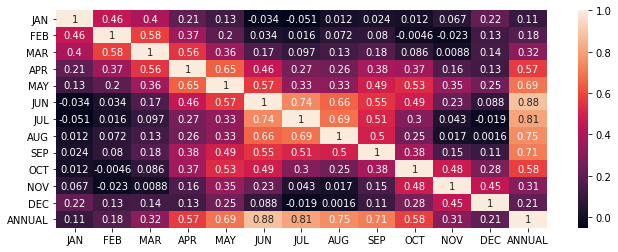

In [ ]:
plt.figure(figsize=(11,4))
sns.heatmap(data[['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC','ANNUAL']].corr(),annot=True)
plt.show()

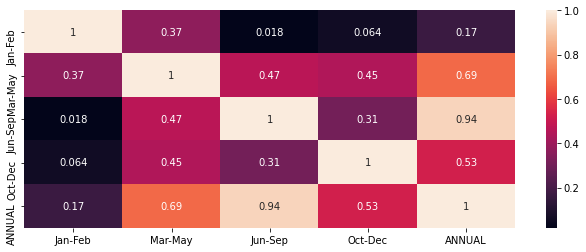

In [ ]:
plt.figure(figsize=(11,4))
sns.heatmap(data[['Jan-Feb','Mar-May','Jun-Sep','Oct-Dec','ANNUAL']].corr(),annot=True)
plt.show()

# Observations

1. Heat Map shows the co-relation(dependency) betwenn the amounts of rainfall over months.

2. From above it is clear that if amount of rainfall is high in the months of july, august, september then the amount of rainfall will be high annually.

3. It is also obwserved that if amount of rainfall in good in the months of october, november, december then the rainfall is going to b good in the overall year.

# Bar Plot

A bar plot shows catergorical data as rectangular bars with the height of bars proportional to the value they represent. It is often used to compare between values of different categories in the data.

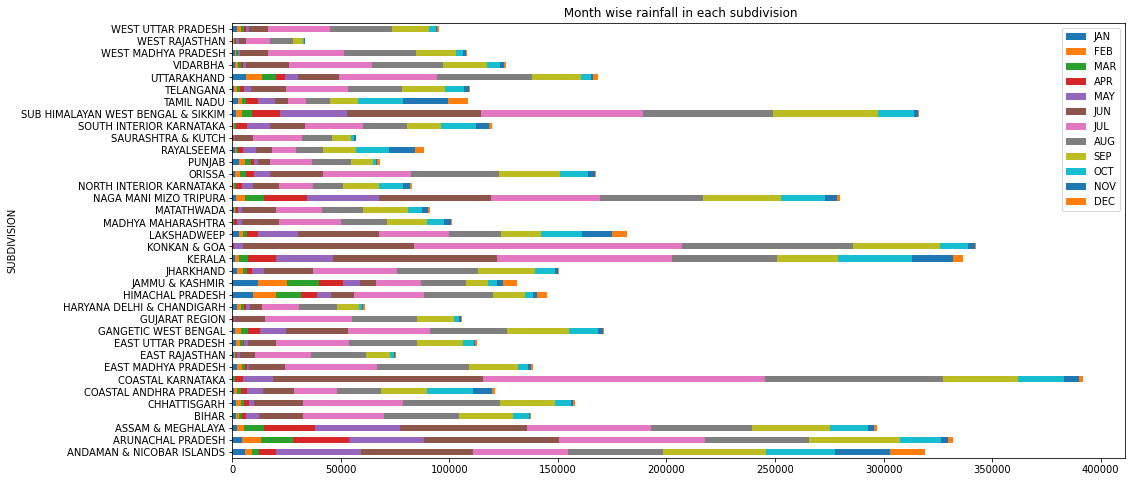

In [ ]:
data[['SUBDIVISION', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL','AUG', 'SEP', 'OCT', 'NOV', 'DEC']].groupby("SUBDIVISION").sum().plot.barh(title=' Month wise rainfall in each subdivision' ,stacked=True,figsize=(16,8));

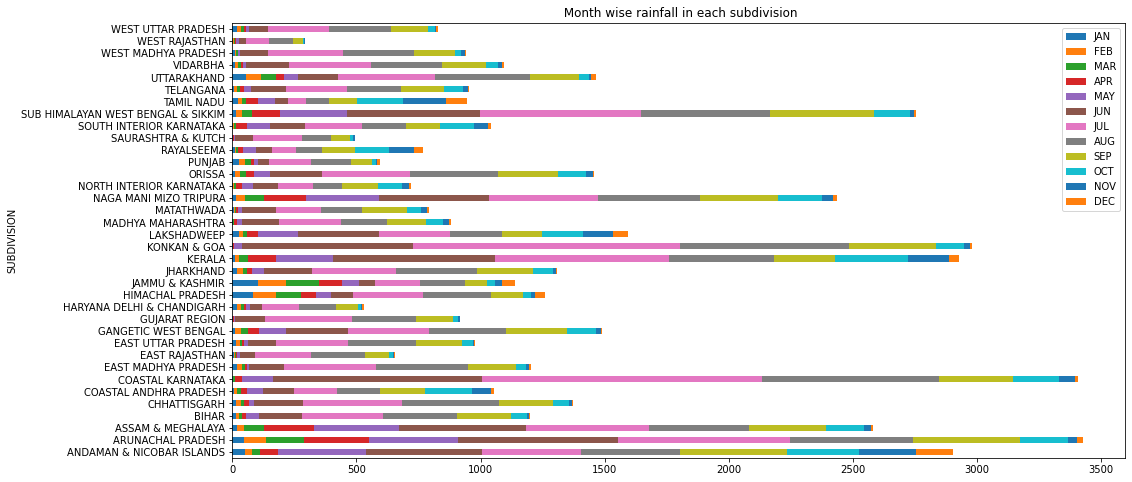

In [ ]:
data[['SUBDIVISION', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL','AUG', 'SEP', 'OCT', 'NOV', 'DEC']].groupby("SUBDIVISION").mean().plot.barh(title=' Month wise rainfall in each subdivision' ,stacked=True,figsize=(16,8));

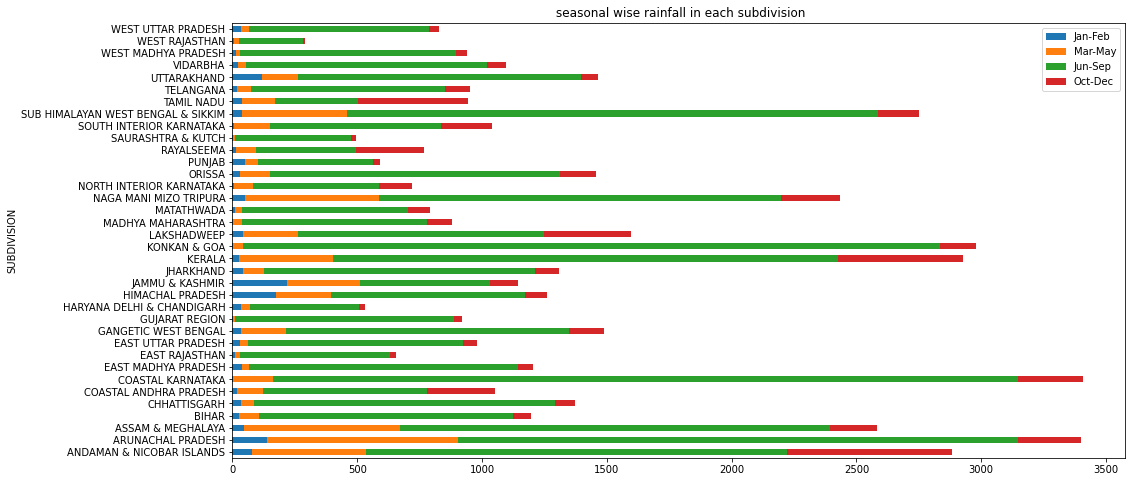

In [ ]:
data[['SUBDIVISION', 'Jan-Feb', 'Mar-May','Jun-Sep', 'Oct-Dec']].groupby("SUBDIVISION").mean().plot.barh(title=' seasonal wise rainfall in each subdivision' ,stacked=True,figsize=(16,8));

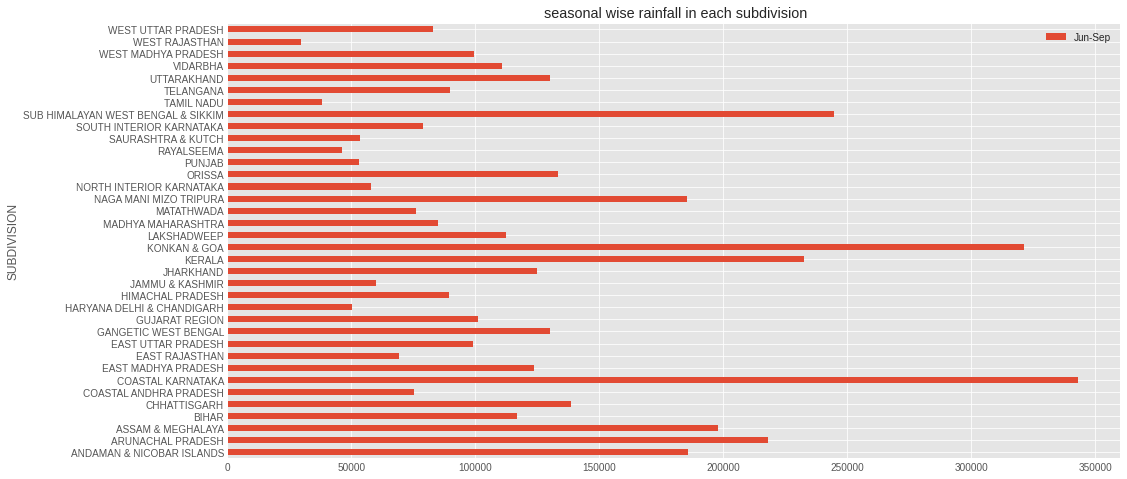

In [ ]:
data[['SUBDIVISION','Jun-Sep' ]].groupby("SUBDIVISION").sum().plot.barh(title=' seasonal wise rainfall in each subdivision' ,stacked=True,figsize=(16,8));

# Observations

1. Above two graphs shows that the amount of rainfall is reasonably good in the months of march, april, may in eastern India.

2. amount of rainfall is high in the months of june-sep.

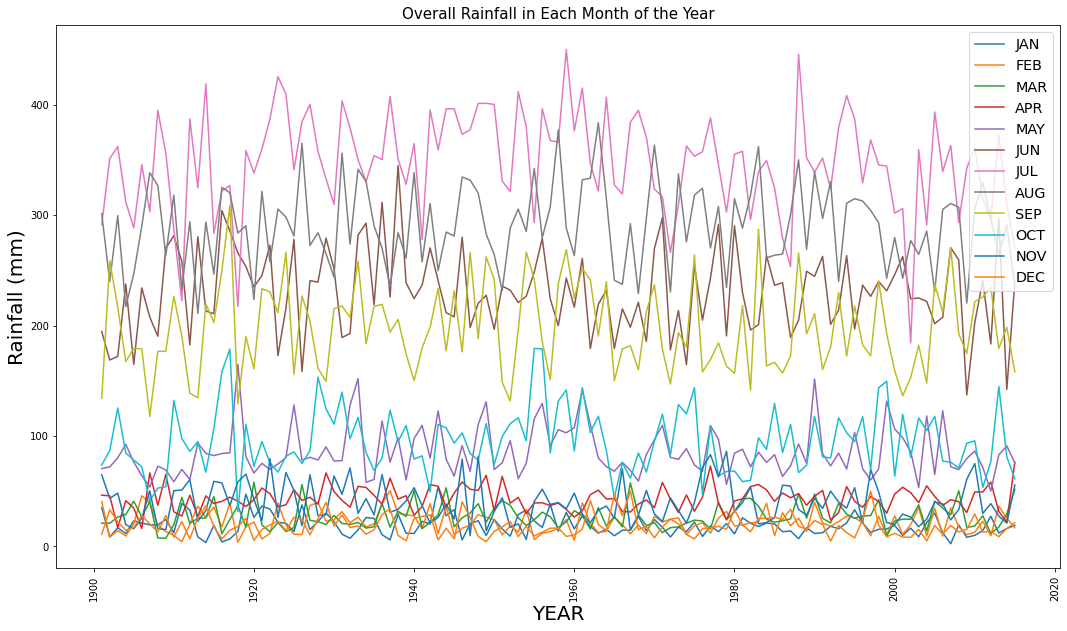

In [ ]:
months = data.columns[2:14]
fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111)
data.groupby('YEAR').mean()[months].plot.line(title='Overall Rainfall in Each Month of the Year', ax=ax,fontsize=10)
#plt.xticks(np.linspace(0,35,36,endpoint=True),xlbls)
plt.xticks(  rotation = 90)
plt.ylabel('Rainfall (mm)')
plt.legend(loc='upper right', fontsize = 'x-large')
ax.title.set_fontsize(15)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)

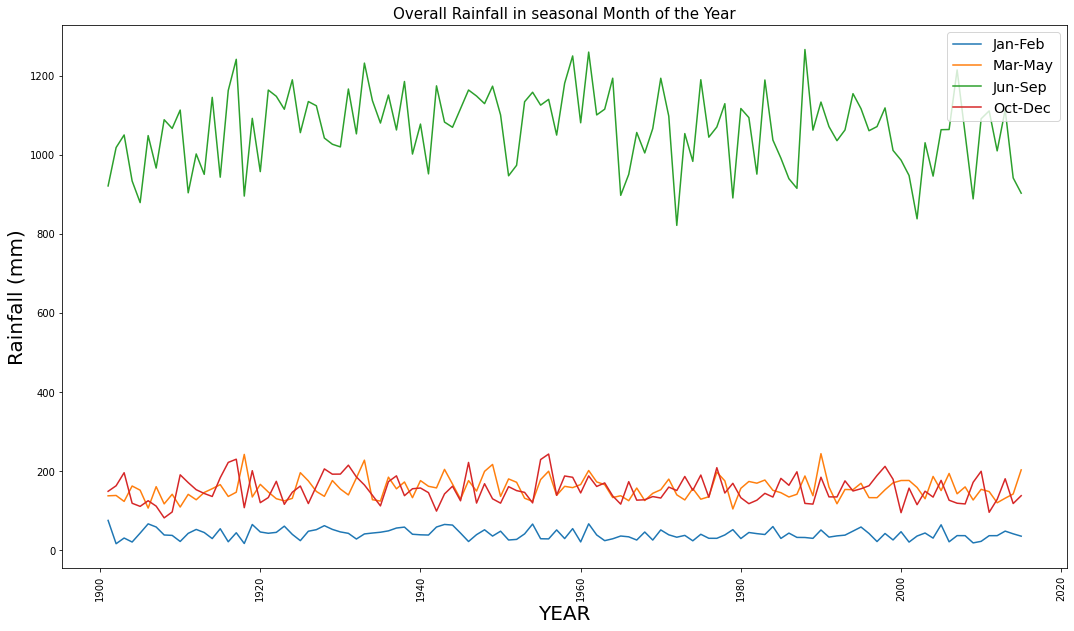

In [ ]:
seasonal = data.columns[15:19]
fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111)
data.groupby('YEAR').mean()[seasonal].plot.line(title='Overall Rainfall in seasonal Month of the Year', ax=ax,fontsize=10)
#plt.xticks(np.linspace(0,35,36,endpoint=True),xlbls)
plt.xticks(  rotation = 90)
plt.ylabel('Rainfall (mm)')
plt.legend(loc='upper right', fontsize = 'x-large')
ax.title.set_fontsize(15)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)

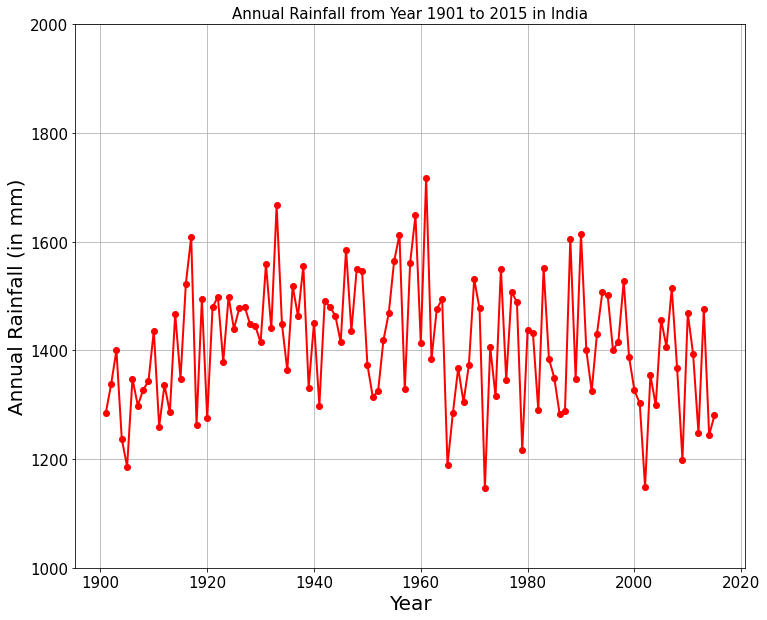

In [ ]:
# Visualizing annual rainfall over the years(1901-2015) in India
ax = data.groupby("YEAR").mean()['ANNUAL'].plot(ylim=(1000,2000),color='r',marker='o',linestyle='-',linewidth=2,figsize=(12,10));
plt.xlabel('Year',fontsize=20)
plt.ylabel('Annual Rainfall (in mm)',fontsize=20)
plt.title('Annual Rainfall from Year 1901 to 2015 in India',fontsize=15)
ax.tick_params(labelsize=15)
plt.grid()

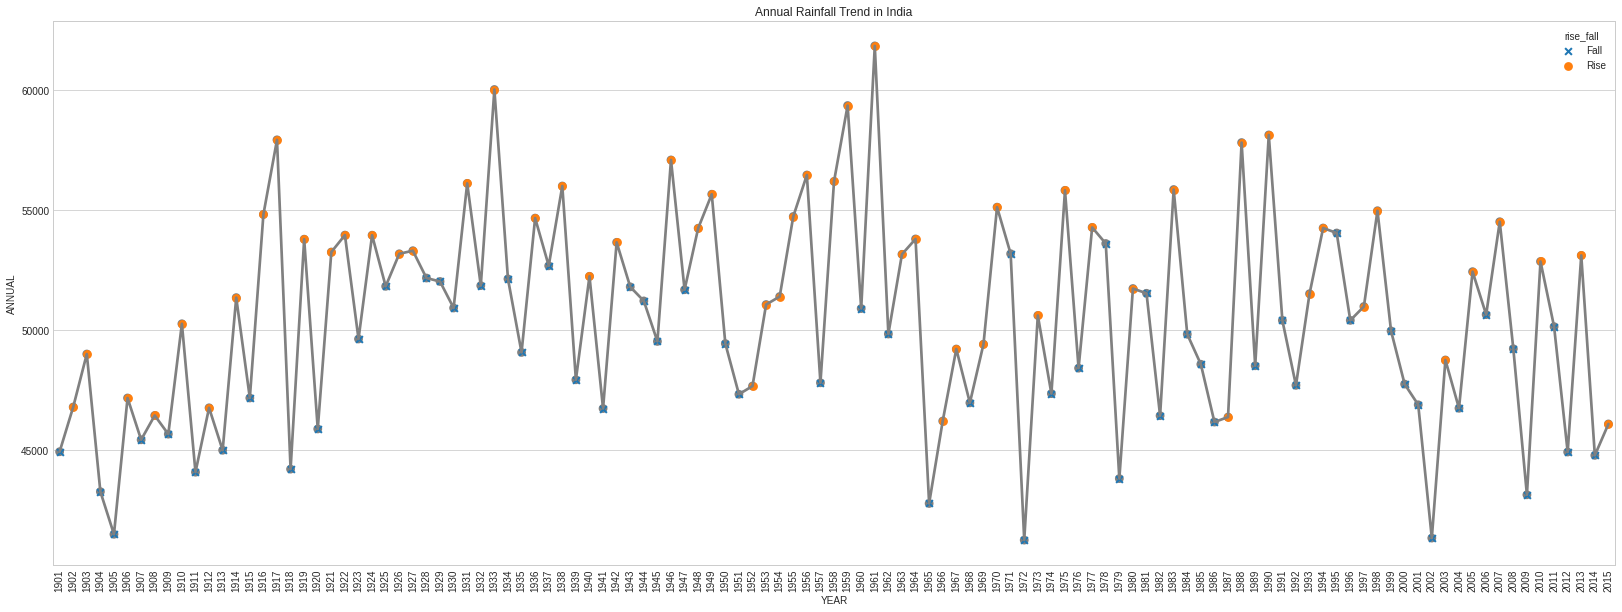

In [ ]:
yearly_rainfall = data.groupby(['YEAR']).sum()
yearly_rainfall['rise_fall'] = np.where(yearly_rainfall['ANNUAL'] > yearly_rainfall['ANNUAL'].shift(1), "Rise", "Fall")
yearly_rainfall['YEAR']= yearly_rainfall.index
year = yearly_rainfall.index
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(28, 10))

ax = sns.pointplot(x=year, y="ANNUAL", data=yearly_rainfall, color='grey')
ax = sns.pointplot(x=year, y="ANNUAL", data=yearly_rainfall,hue='rise_fall', markers=["x", "o"], join=False)
ax = plt.xticks(rotation=90)
ax = plt.title('Annual Rainfall Trend in India')

# Box Plot

A box and whisker plot (sometimes called a boxplot) is a graph that presents information from a five-number summary. ... It is often used in explanatory data analysis. This type of graph is used to show the shape of the distribution, its central value, and its variability.


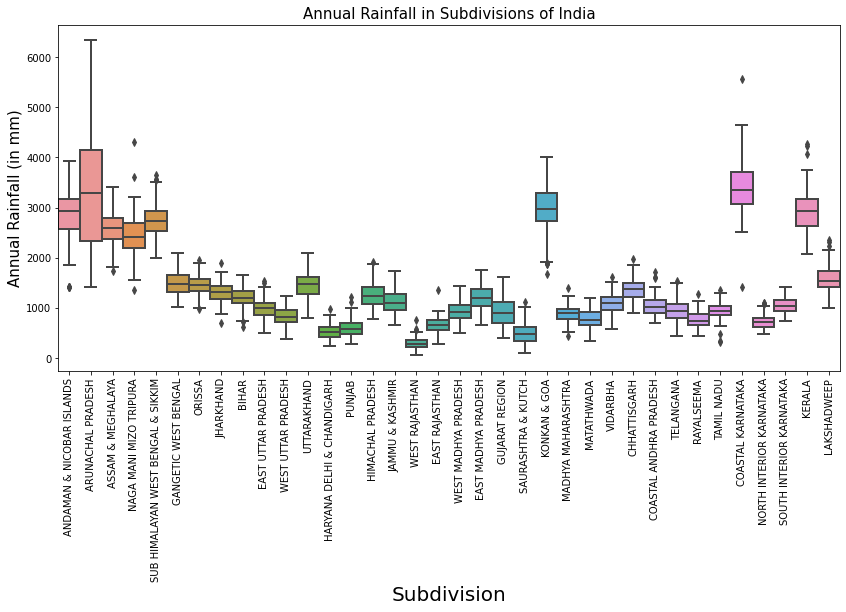

In [ ]:
# Annual rainfall in subdivisions of India
plt.figure(figsize=(14,14))
ax = plt.subplot(2,1,1)
ax = sns.boxplot(x="SUBDIVISION", y="ANNUAL", data=data, width=1, linewidth=2)
ax.set_xlabel('Subdivision',fontsize=20)
ax.set_ylabel('Annual Rainfall (in mm)',fontsize=15)
plt.title('Annual Rainfall in Subdivisions of India',fontsize=15)
ax.tick_params(axis='x', labelsize=10, rotation=90)
ax.tick_params(axis='y', labelsize=10, rotation=0)

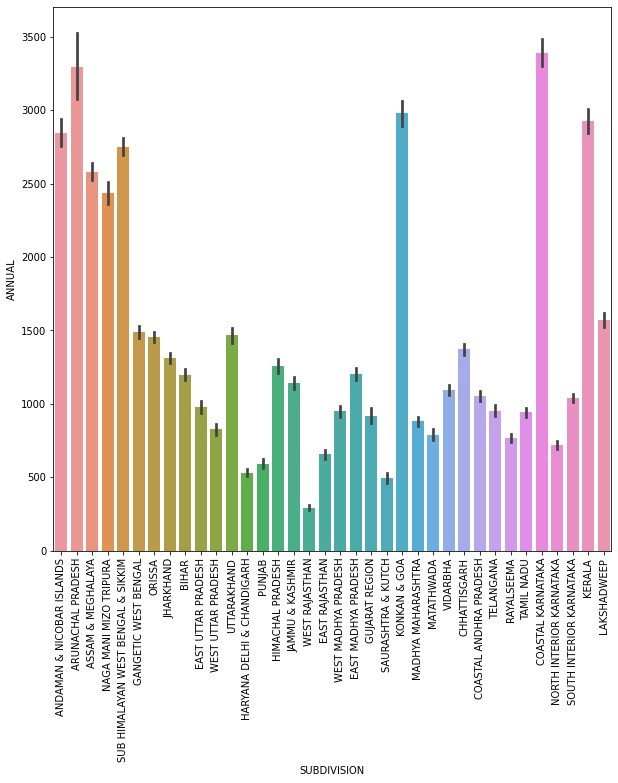

In [ ]:
plt.figure(figsize=(10,10))
ax = plt.xticks(rotation=90)
ax = sns.barplot(x='SUBDIVISION', y='ANNUAL', data=data)

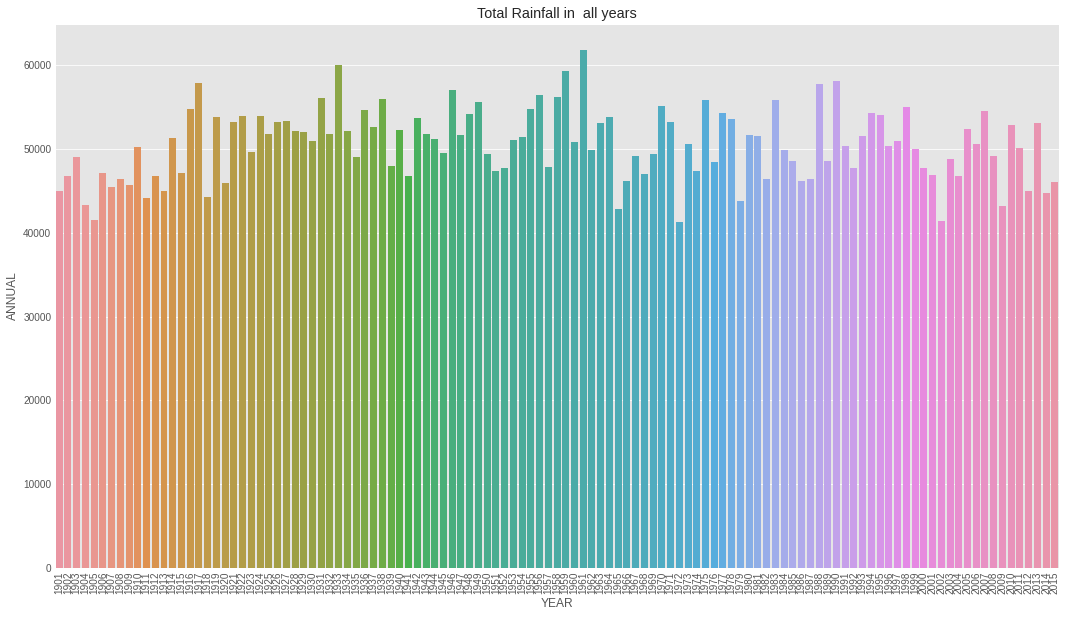

In [ ]:
fig = plt.figure(figsize=(18, 10))
ax3 = plt.xticks(rotation=90)
ax3 = sns.barplot(x='YEAR', y='ANNUAL', data=yearly_rainfall)
ax3 = plt.title('Total Rainfall in  all years')

ValueError: ignored

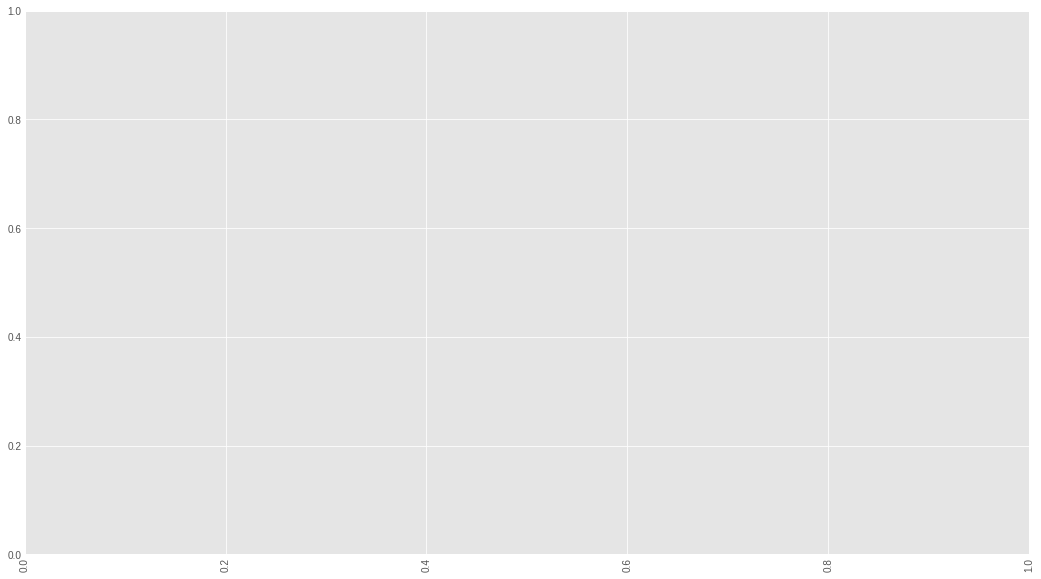

In [ ]:
fig = plt.figure(figsize=(18, 10))
ax3 = plt.xticks(rotation=90)
ax3 = sns.barplot(x='SUBDIVISION', y='ANNUAL', data=yearly_rainfall)
ax3 = plt.title('Total Rainfall in  all years')

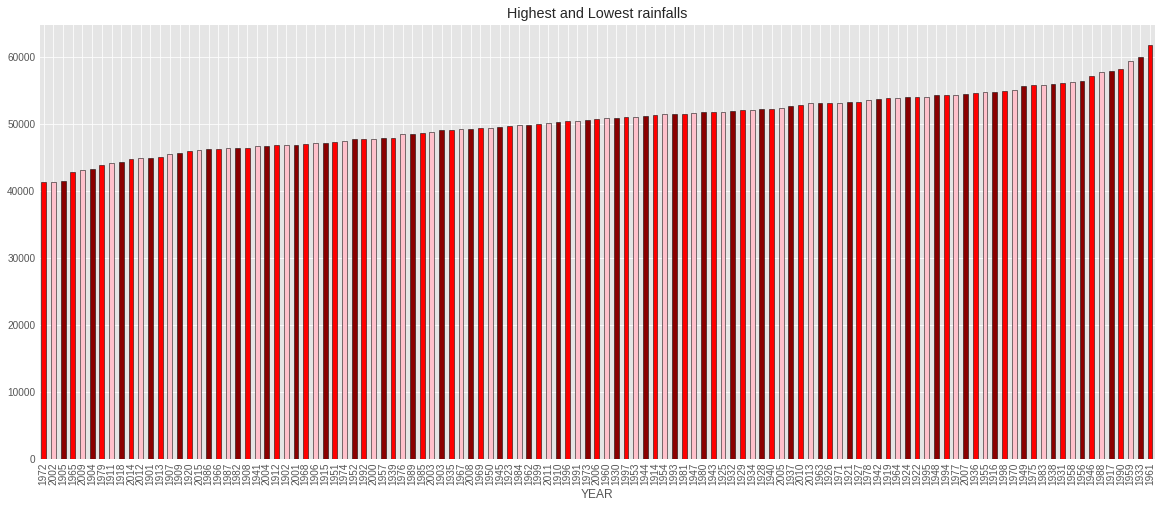

In [ ]:
x1 = yearly_rainfall.sort_values('ANNUAL')
fig = plt.figure(figsize=(20, 8))
ax = plt.xticks(rotation=90)
ax = x1['ANNUAL'].plot.bar(color=['red', 'pink', 'darkred'], edgecolor = 'black')
ax = plt.title('Highest and Lowest rainfalls')